# Liverpool GP Opt Out Data

This is a quick investigation of the relationship between the number of GP opt outs and the deprivation score for GP practice. This needs to be expanded on as an explanation

[TODO] Write up narrative

## Data Sources
[MI National Data Opt-Out - NHS Digital](https://digital.nhs.uk/data-and-information/publications/statistical/national-data-opt-out)

[National General Practice Profiles - Data - OHID](https://fingertips.phe.org.uk/profile/general-practice/data#page/0/gid/2000005/pat/167/par/E38000101/ati/7/are/N82054/iid/639/age/28/sex/4/cat/-1/ctp/-1/yrr/1/cid/4/tbm/1)

## Loading the Data

The first step was to load and combine the data sources. The files used can be viewed in the GitHub repository [data folder](https://github.com/grazulis/gp-outout-book/tree/main/data)

In [10]:
# Code to load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

gp_optout = pd.read_csv("data/NDOP_sum_Apr_2022_Practices.csv")
gp_optout.set_index = "Practice code"

all_gp_files = [
    "data/Overview Cheshire CCG.csv", 
    "data/Overview Halton CCG.csv", 
    "data/Overview Liverpool CCG.csv",
    "data/Overview South Sefton CCG.csv",
    "data/Overview Southport and Formby CCG.csv",
    "data/Overview St Helens CCG.csv",
    "data/Overview Warrington CCG.csv",
    "data/Overview Wirral CCG.csv"
]
gp_profiles = pd.concat((pd.read_csv(f) for f in all_gp_files), ignore_index=True) 

# Get deprivation indicators from full profile
gp_deprivation = gp_profiles[gp_profiles["Indicator ID"] == 93553]
gp_deprivation.set_index = "Area Code"
# Remove national and ccg values
gp_deprivation = gp_deprivation[~gp_deprivation["Parent Code"].isnull()]


In [11]:
gp_output_data = pd.merge(
    gp_deprivation,
    gp_optout,
    how="left",
    left_on="Area Code",
    right_on="Practice code",
    suffixes=("", "_o")
)

gp_output_data['Decile rank'] = pd.qcut(gp_output_data['Value'], 10, labels = False)


## Plotting the data

The data was plotted. There is an outlier of one practice where the opt out rate is over 80%. For later plots this was excluded.

Opt-out Rate by GP Practice and deprivation


<AxesSubplot: xlabel='Value', ylabel='Optout Rate'>

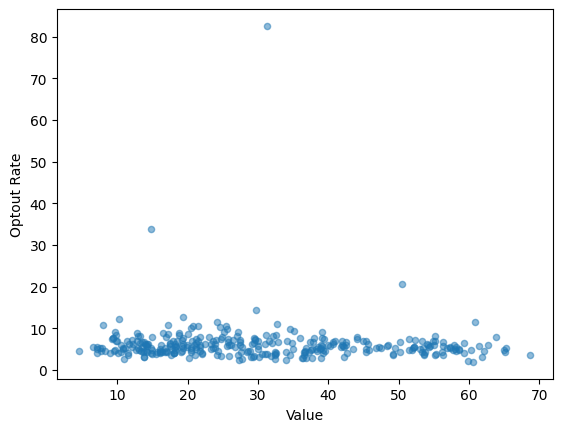

In [12]:
print("Opt-out Rate by GP Practice and deprivation")
gp_output_data.plot.scatter(x="Value", y="Optout Rate", alpha = 0.5)

Opt-out Rate by GP Practice and deprivation, excluding outlier practices


<AxesSubplot: xlabel='Value', ylabel='Optout Rate'>

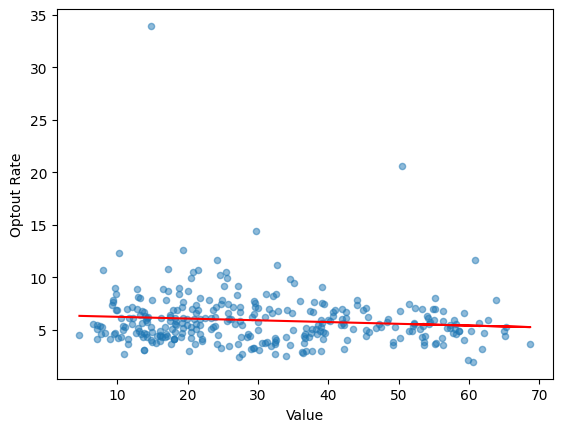

In [13]:
print("Opt-out Rate by GP Practice and deprivation, excluding outlier practices")
gp_output_nooutlier = gp_output_data[gp_output_data["Optout Rate"] < 50]


d = np.polyfit(gp_output_nooutlier["Value"],gp_output_nooutlier["Optout Rate"],1)
f = np.poly1d(d)

gp_output_nooutlier.insert(6,'Dreg',f(gp_output_nooutlier['Value']))

ax = gp_output_nooutlier.plot.scatter(x="Value", y="Optout Rate", alpha = 0.5)
gp_output_nooutlier.plot(x='Value',y='Dreg',color='Red',legend=False,ax=ax)



Opt-out Rate for deprivation, by decile


<AxesSubplot: xlabel='Decile rank', ylabel='Optout Rate'>

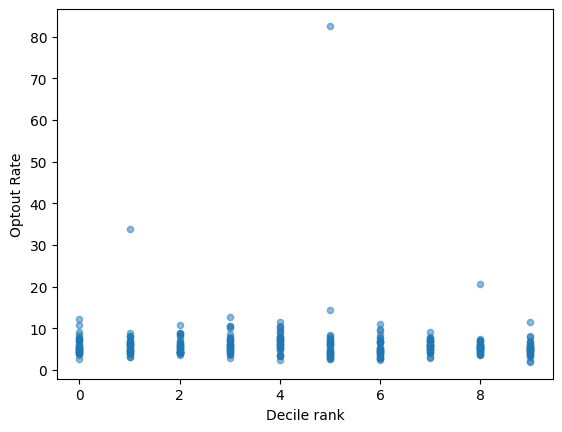

In [14]:
print("Opt-out Rate for deprivation, by decile")
gp_output_data.plot.scatter(x="Decile rank", y="Optout Rate", alpha = 0.5)